# BH score

This is a demo script reproducing the main results of [Nonaka et al. (2020) Brain hierarchy score: Which deep neural networks are hierarchically brain-like?](https://www.biorxiv.org/content/10.1101/2020.07.22.216713v2).

In [1]:
import os
import json
from itertools import product

import hdf5storage

from bhscore import compute_bhscore, compute_bhscore_layerselect

In [2]:
# Settings
with open('settings.json', 'r') as f:
    settings = json.load(f)

networks = settings['dnns']

subjects = settings['subjects']
rois = settings['rois']

decoding_accuracy_dir = './data/decoding_accuracy_shared/ImageNetTest'

In [3]:
# Load decoding accuracy
decoding_accuracy = {}

for net_name, net in networks.items():
    layers = net['layers']

    acc_net = []
    for lay in layers:

        acc_layer = []  # This should be a 2-d array of ROIs x units.

        for roi in rois:
            acc_roi = []

            # Pool decoding accuracies across subjects
            for sub in subjects:
                acc_file = os.path.join(decoding_accuracy_dir, net['dir'], lay, sub, roi, 'accuracy.mat')
                acc = hdf5storage.loadmat(acc_file)['accuracy'].flatten()
                acc_roi.append(acc)
            #acc_roi = np.hstack(acc_roi)[:, np.newaxis]
            acc_roi = np.hstack(acc_roi)
            acc_layer.append(acc_roi)

        #acc_layer = np.hstack(acc_layer)
        acc_layer = np.vstack(acc_layer)
        acc_net.append(acc_layer)

    decoding_accuracy.update({net_name: acc_net})


In [4]:
# Calculate BH scores
bh_scores = {}

for net in networks:
    bh_score = np.mean(compute_bhscore_layerselect(decoding_accuracy[net], pval=0.05, n_layers=5, n_repeat=100))
    bh_scores.update({net: bh_score})
    print('{}: {}'.format(net, bh_score))

CORnet-Z: 0.297784575523
CORnet-R: 0.457779543929
Inception-ResNet-v2: 0.197933382276
ResNet-18: 0.437522850043
PNASNet-Large: 0.184733321857
DenseNet-201: 0.405121138172
DenseNet-169: 0.387083550603
ResNet-152-v2: 0.139631767272
Inception-v1: 0.270063403776
Inception-v2: 0.240545408925
Inception-v3: 0.042447353078
Inception-v4: 0.0298654417064
DenseNet-161: 0.39897363218
MobileNet-v2-1.4-224: 0.204460670758
ResNet-101-v2: 0.1487711158
DenseNet-121: 0.404749196471
ResNet-50-v2: 0.184279941318
VGG-19: 0.483667113131
CORnet-S: 0.446292774913
VGG-16: 0.445730841639
VGG-S: 0.53738638354
SqueezeNet-1.1: 0.379244177764
SqueezeNet-1.0: 0.467233331319
VGG-M: 0.52352703766
VGG-F: 0.511576607685
AlexNet: 0.498359140813
NASNet-Large: 0.0805208250664
NASNet-Mobile: 0.196187995666
ResNet-34: 0.408523665882


VGG-S: 0.53738638354
VGG-M: 0.52352703766
VGG-F: 0.511576607685
AlexNet: 0.498359140813
VGG-19: 0.483667113131
SqueezeNet-1.0: 0.467233331319
CORnet-R: 0.457779543929
CORnet-S: 0.446292774913
VGG-16: 0.445730841639
ResNet-18: 0.437522850043
ResNet-34: 0.408523665882
DenseNet-201: 0.405121138172
DenseNet-121: 0.404749196471
DenseNet-161: 0.39897363218
DenseNet-169: 0.387083550603
SqueezeNet-1.1: 0.379244177764
CORnet-Z: 0.297784575523
Inception-v1: 0.270063403776
Inception-v2: 0.240545408925
MobileNet-v2-1.4-224: 0.204460670758
Inception-ResNet-v2: 0.197933382276
NASNet-Mobile: 0.196187995666
PNASNet-Large: 0.184733321857
ResNet-50-v2: 0.184279941318
ResNet-101-v2: 0.1487711158
ResNet-152-v2: 0.139631767272
NASNet-Large: 0.0805208250664
Inception-v3: 0.042447353078
Inception-v4: 0.0298654417064


([], <a list of 0 Text xticklabel objects>)

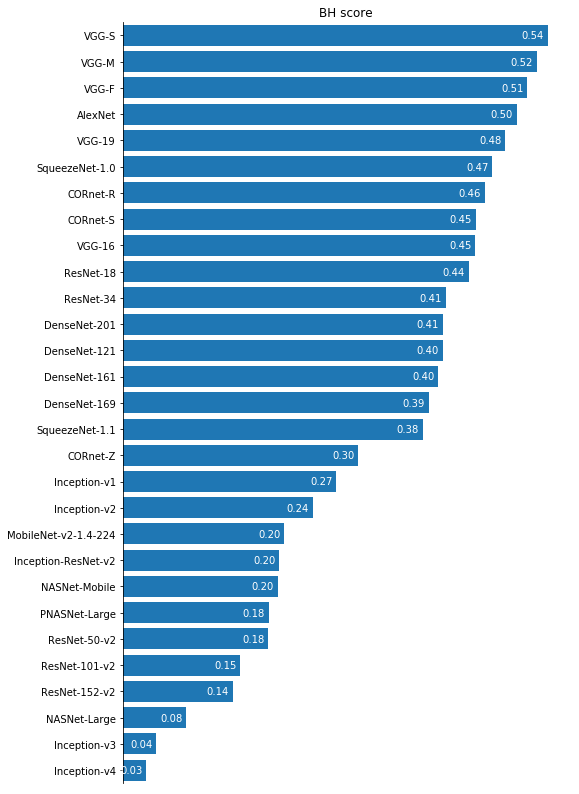

In [5]:
# Display BH score ranking

nets = np.array([n for n in bh_scores.keys()])
bhscores = np.array([s for s in bh_scores.values()])

ranking_index = np.argsort(bhscores)[::-1]
nets = nets[ranking_index]
bhscores = bhscores[ranking_index]

for net, bhscore in zip(nets, bhscores):
    print('{}: {}'.format(net, bhscore))

# Bar chart

fig = plt.figure(figsize=(8, 14))

ypos = range(nets.shape[0])[::-1]

plt.barh(ypos, bhscores)

plt.title('BH score')

plt.yticks(ypos, nets)
plt.ylim([-0.5, nets.shape[0] - 0.5])

for yp, bhs in zip(ypos, bhscores):
    plt.text(bhs - 0.005, yp, '%.2f' % bhs, color='white',
             horizontalalignment='right',
             verticalalignment='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])